In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
new_model = tf.keras.models.load_model('crop_classification_model-roast.h5')


TRAINING_FILE = 'C:\\Users\\__VivoBook__\\Downloads/Roast.v1i.tensorflow (1)/train/_annotations.csv'
VALIDATION_FILE = 'C:\\Users\\__VivoBook__\\Downloads/Roast.v1i.tensorflow (1)/valid/_annotations.csv'
TEST_FILE = 'C:\\Users\\__VivoBook__\\Downloads/Roast.v1i.tensorflow (1)/test/_annotations.csv'

def parse_data_from_input(filename):
    dataframe = pd.read_csv(filename)
    label_mapping = {'Raw': 0, 'Medium Roast': 1, 'Dark Roast' : 2, 'Light Roast' : 3}
    dataframe['class'] = dataframe['class'].map(label_mapping)

    images = []
    labels = []

    for _, row in dataframe.iterrows():
        image_filename = row['filename']
        image_path = os.path.join(os.path.dirname(filename), image_filename)
        image = cv2.imread(image_path)

        x_min = row['xmin']
        y_min = row['ymin']
        x_max = row['xmax']
        y_max = row['ymax']

        cropped_image = image[y_min:y_max, x_min:x_max]
        resized_image = cv2.resize(cropped_image, (224, 224))
        reshaped_image = np.expand_dims(resized_image, axis=0)
        images.append(reshaped_image)
        labels.append(row['class'])

    images = np.concatenate(images, axis=0)
    labels = np.array(labels)

    unique_labels = np.unique(labels)
    print("Unique labels:", unique_labels)
    print("Sample images:", images[:5])

    return images, labels

training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)
test_images, test_labels = parse_data_from_input(TEST_FILE)

#normalization
training_images = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

train_loss, train_acc = new_model.evaluate(training_images, training_labels)
val_loss, val_acc = new_model.evaluate(validation_images, validation_labels)
test_loss, test_acc = new_model.evaluate(test_images, test_labels)
print(f'val_loss: {val_loss}, val_acc: {val_acc}')
print(f'test_loss: {test_loss}, test_acc: {test_acc}')
print(f'train_loss: {train_loss}, train_acc: {train_acc}')

Unique labels: [0 1 2 3]
Sample images: [[[[103 115 127]
   [104 116 126]
   [104 116 128]
   ...
   [105 118 132]
   [103 116 130]
   [100 113 127]]

  [[101 113 125]
   [102 114 125]
   [102 114 126]
   ...
   [104 117 131]
   [102 115 130]
   [ 99 113 127]]

  [[ 98 109 123]
   [ 99 111 123]
   [ 99 110 124]
   ...
   [102 115 131]
   [101 114 130]
   [ 99 112 128]]

  ...

  [[ 20  27  42]
   [ 20  28  45]
   [ 22  29  48]
   ...
   [113 142 173]
   [110 140 172]
   [117 146 178]]

  [[ 19  24  41]
   [ 20  27  44]
   [ 24  30  49]
   ...
   [121 147 180]
   [105 135 168]
   [113 144 178]]

  [[ 18  22  40]
   [ 20  27  44]
   [ 25  31  50]
   ...
   [125 150 184]
   [101 131 166]
   [110 142 178]]]


 [[[ 29  36  45]
   [ 28  35  44]
   [ 22  30  40]
   ...
   [145 193 235]
   [144 192 234]
   [147 194 237]]

  [[ 27  34  43]
   [ 31  38  47]
   [ 27  35  45]
   ...
   [137 185 227]
   [134 182 224]
   [137 185 227]]

  [[ 29  36  45]
   [ 31  39  48]
   [ 29  37  47]
   ...
   [1

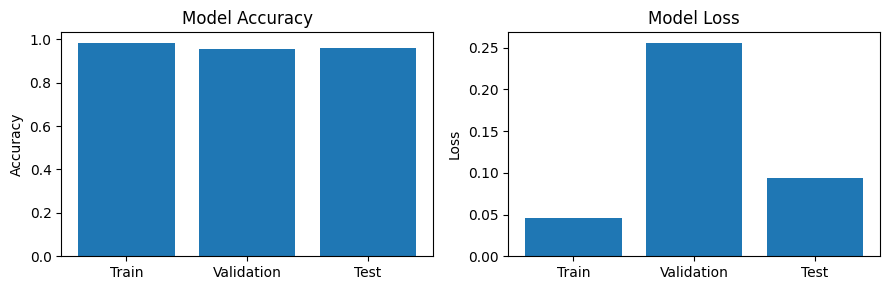

In [3]:
import matplotlib.pyplot as plt

# Accuracy comparison
plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.bar(['Train', 'Validation', 'Test'], [train_acc, val_acc, test_acc])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

# Loss comparison
plt.subplot(122)
plt.bar(['Train', 'Validation', 'Test'], [train_loss, val_loss, test_loss])
plt.title('Model Loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


<class 'numpy.ndarray'>
1/1 [==============================] - 3s 3s/step
C:/Users/__VivoBook__/Downloads/test/bean1.jpeg is Dark Roast bean.
[[0.11393763 0.311877   0.38902575 0.18515965]]


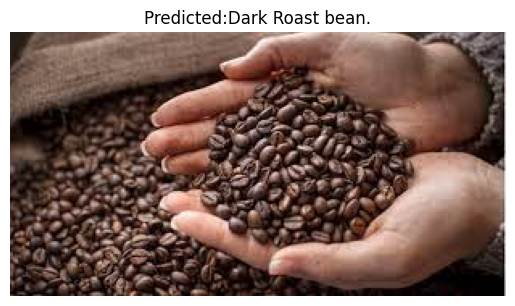

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 343ms/step
C:/Users/__VivoBook__/Downloads/test/bean2.jpeg is Dark Roast bean.
[[4.0306576e-13 1.8016456e-09 1.0000000e+00 4.8597393e-10]]


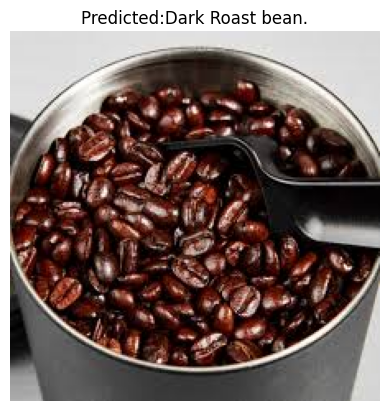

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 372ms/step
C:/Users/__VivoBook__/Downloads/test/bean3.jpeg is Medium Roast bean.
[[1.11282645e-02 9.85481977e-01 2.47677718e-03 9.12910618e-04]]


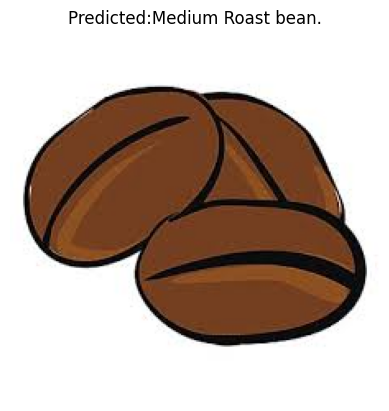

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 291ms/step
C:/Users/__VivoBook__/Downloads/test/bean4.jpeg is Medium Roast bean.
[[2.0844123e-01 7.9155779e-01 9.0188649e-08 9.6830354e-07]]


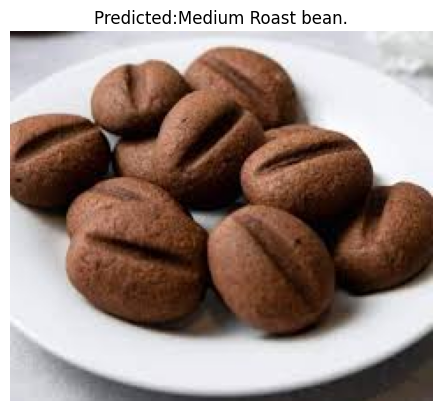

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 287ms/step
C:/Users/__VivoBook__/Downloads/test/bean5.jpeg is Dark Roast bean.
[[2.0103900e-05 4.3177798e-02 9.5306754e-01 3.7345944e-03]]


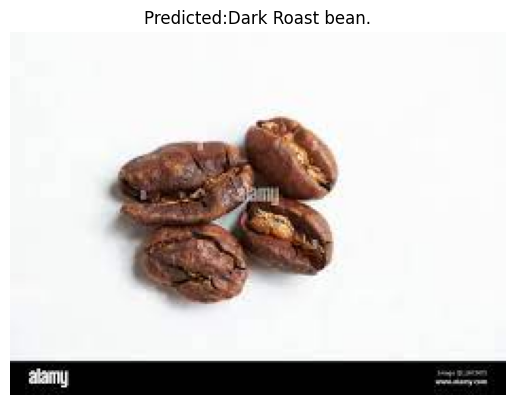

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 275ms/step
C:/Users/__VivoBook__/Downloads/test/bean6.jpeg is Raw bean.
[[7.2517061e-01 2.7332973e-01 3.4579937e-04 1.1539058e-03]]


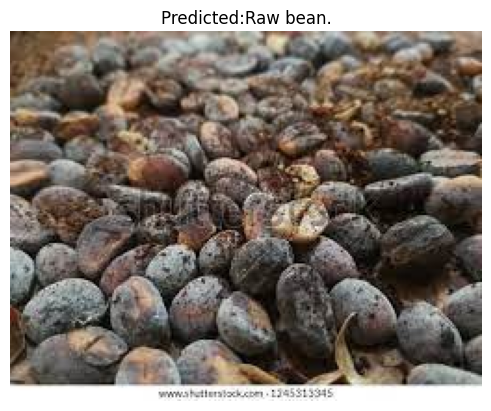

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 272ms/step
C:/Users/__VivoBook__/Downloads/test/bean7.jpeg is Medium Roast bean.
[[7.920615e-02 9.206713e-01 3.893173e-05 8.364416e-05]]


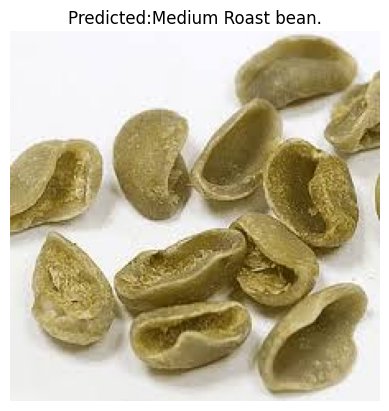

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 268ms/step
C:/Users/__VivoBook__/Downloads/test/bean8.jpeg is Dark Roast bean.
[[5.65102166e-11 1.16149934e-07 9.99999881e-01 5.53905322e-09]]


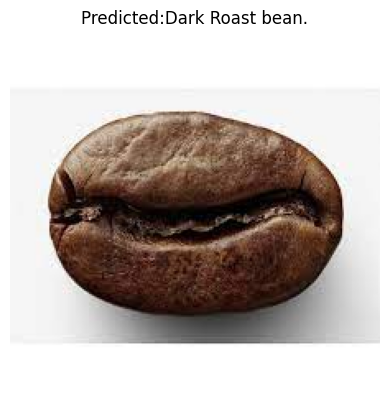

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 274ms/step
C:/Users/__VivoBook__/Downloads/test/bean9jpeg.jpeg is Medium Roast bean.
[[0.16103156 0.8054671  0.02185958 0.01164176]]


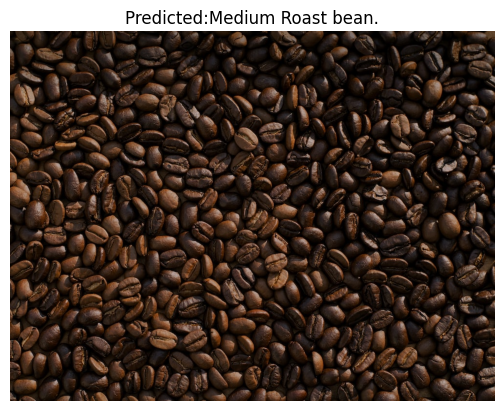

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 262ms/step
C:/Users/__VivoBook__/Downloads/test/bean10.jpg is Dark Roast bean.
[[0.0028157  0.10209557 0.8926767  0.00241195]]


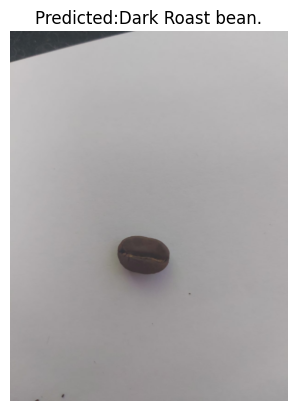

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 276ms/step
C:/Users/__VivoBook__/Downloads/test/bean11.jpg is Medium Roast bean.
[[0.01561492 0.54104155 0.4400822  0.00326133]]


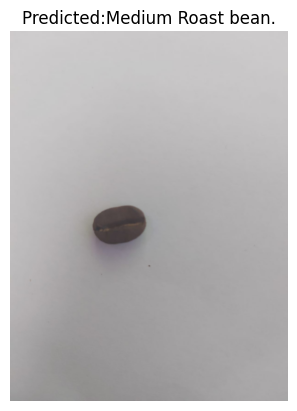

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 254ms/step
C:/Users/__VivoBook__/Downloads/test/bean12.jpg is Medium Roast bean.
[[2.3010713e-07 9.9999964e-01 1.2105367e-07 1.9116425e-10]]


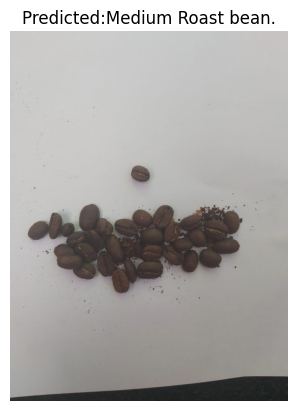

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 277ms/step
C:/Users/__VivoBook__/Downloads/test/bean13.jpg is Medium Roast bean.
[[1.6023388e-07 9.9999988e-01 1.3761421e-08 3.5837892e-11]]


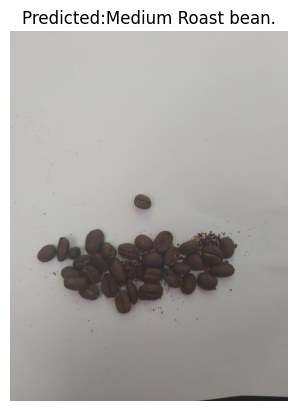

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 246ms/step
C:/Users/__VivoBook__/Downloads/test/bean14.jpg is Dark Roast bean.
[[8.5888713e-10 2.5041079e-05 9.9997497e-01 1.8191601e-08]]


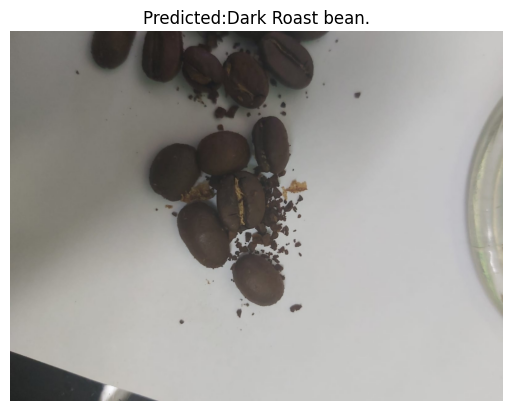

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 254ms/step
C:/Users/__VivoBook__/Downloads/test/bean15.jpg is Dark Roast bean.
[[6.2962987e-15 2.4957257e-11 1.0000000e+00 1.9685911e-12]]


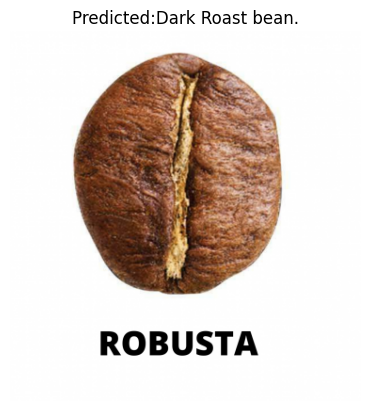

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 262ms/step
C:/Users/__VivoBook__/Downloads/test/bean16.jpeg is Dark Roast bean.
[[1.4269201e-15 3.7160375e-12 1.0000000e+00 2.6876216e-12]]


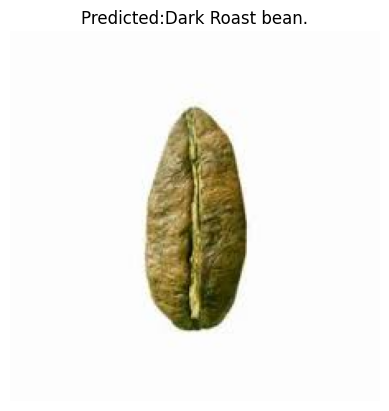

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 263ms/step
C:/Users/__VivoBook__/Downloads/test/bean17.jpeg is Dark Roast bean.
[[1.6805961e-10 3.7767251e-08 1.0000000e+00 1.6306911e-08]]


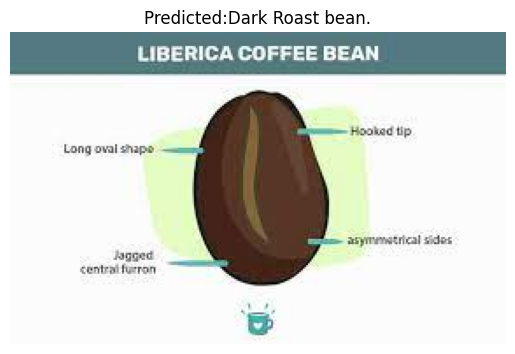

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 262ms/step
C:/Users/__VivoBook__/Downloads/test/bean18.jpeg is Dark Roast bean.
[[0.00245013 0.07201459 0.92243445 0.0031008 ]]


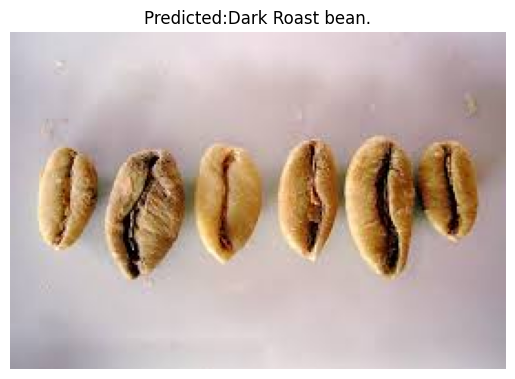

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 331ms/step
C:/Users/__VivoBook__/Downloads/test/bean19.jpeg is Medium Roast bean.
[[1.3383884e-04 9.7528660e-01 2.3677258e-02 9.0232684e-04]]


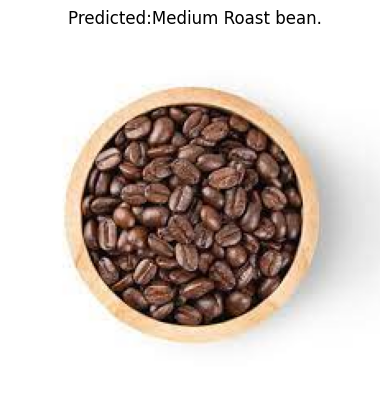

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 265ms/step
C:/Users/__VivoBook__/Downloads/test/bean20.jpeg is Medium Roast bean.
[[1.1856121e-06 9.9999881e-01 2.6242285e-08 1.2997888e-08]]


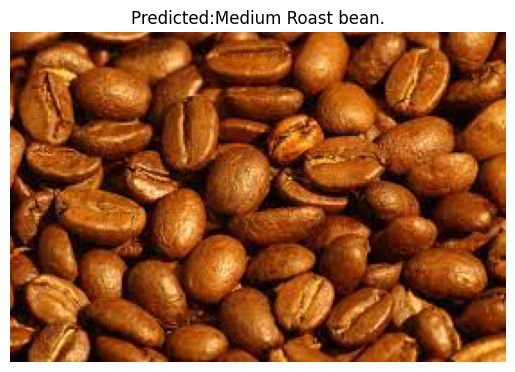

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 329ms/step
C:/Users/__VivoBook__/Downloads/test/bean21.jpeg is Dark Roast bean.
[[8.4321378e-21 6.9173443e-16 1.0000000e+00 1.9553811e-16]]


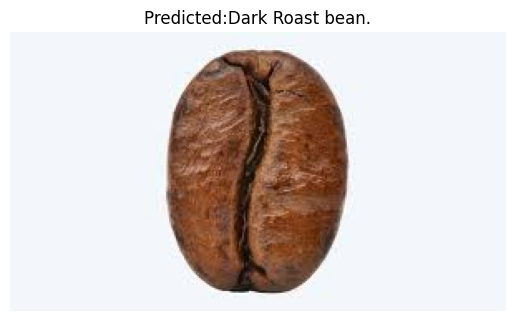

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 316ms/step
C:/Users/__VivoBook__/Downloads/test/bean22.jpeg is Dark Roast bean.
[[1.8893652e-17 1.3435249e-13 1.0000000e+00 9.0097858e-14]]


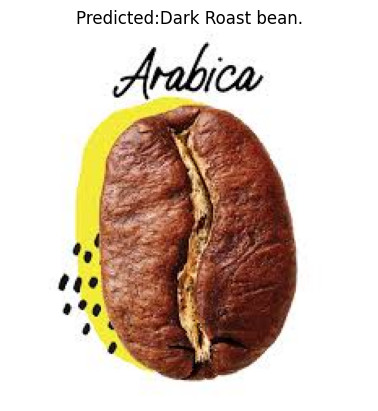

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 266ms/step
C:/Users/__VivoBook__/Downloads/test/bean23.jpeg is Dark Roast bean.
[[3.6400882e-10 1.8556610e-06 9.9999797e-01 2.2053371e-07]]


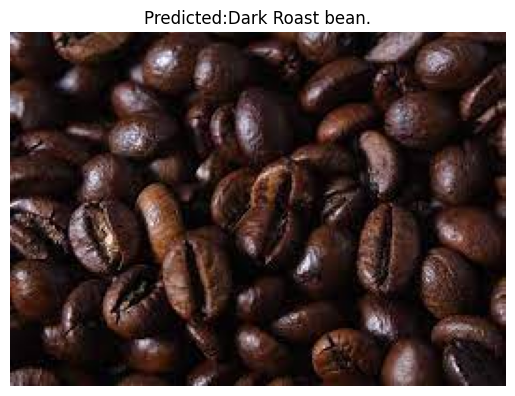

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 265ms/step
C:/Users/__VivoBook__/Downloads/test/bean24.jpeg is Dark Roast bean.
[[7.7399654e-06 1.4172654e-04 9.9962831e-01 2.2226082e-04]]


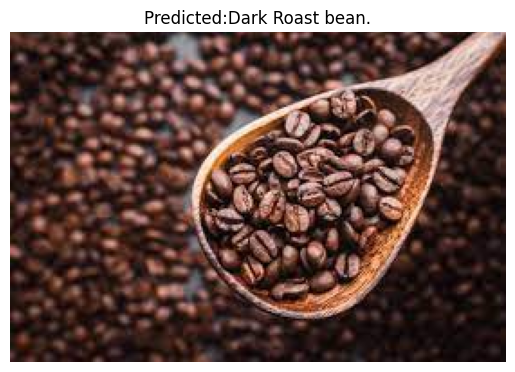

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 249ms/step
C:/Users/__VivoBook__/Downloads/test/bean25.jpeg is Dark Roast bean.
[[1.6066285e-11 3.0318895e-07 9.9999952e-01 1.4256493e-07]]


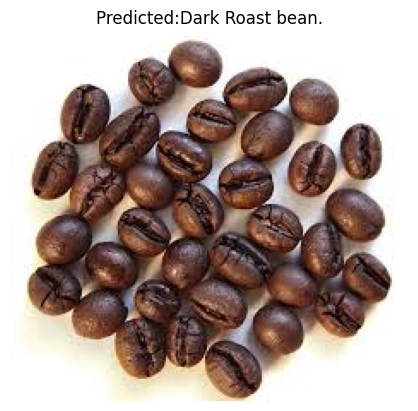

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 317ms/step
C:/Users/__VivoBook__/Downloads/test/bean26.jpeg is Dark Roast bean.
[[6.9933127e-14 2.2079519e-10 1.0000000e+00 2.1139741e-11]]


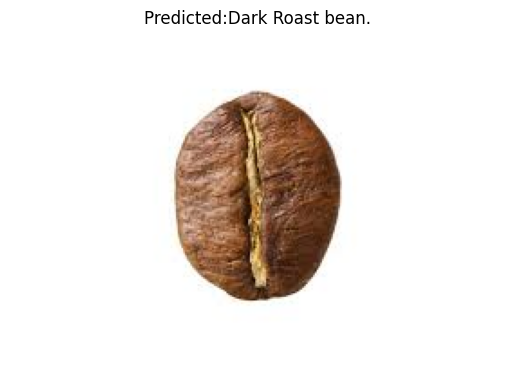

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 293ms/step
C:/Users/__VivoBook__/Downloads/test/bean27.jpeg is Dark Roast bean.
[[7.0067268e-04 4.0143318e-03 9.9059546e-01 4.6895789e-03]]


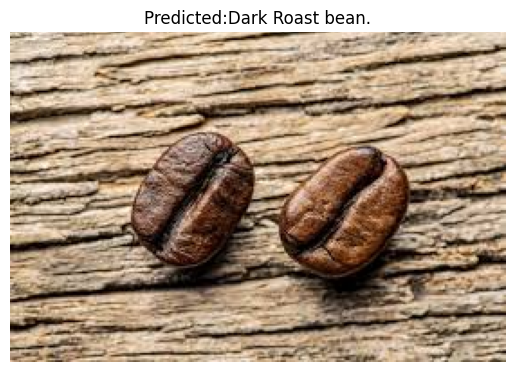

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 279ms/step
C:/Users/__VivoBook__/Downloads/test/bean28.jpg is Dark Roast bean.
[[6.4200432e-09 2.5326530e-05 9.9997437e-01 2.8051670e-07]]


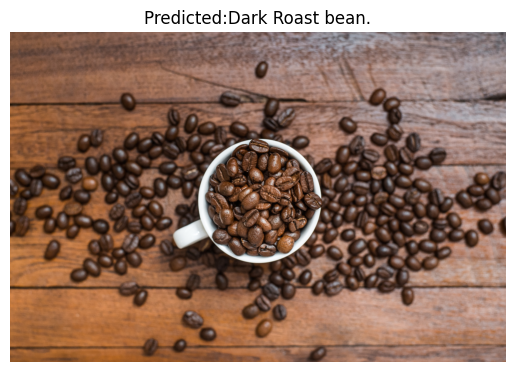

<class 'numpy.ndarray'>
1/1 [==============================] - 1s 940ms/step
C:/Users/__VivoBook__/Downloads/test/bean29.jpg is Dark Roast bean.
[[0.00194047 0.13648748 0.86055875 0.00101339]]


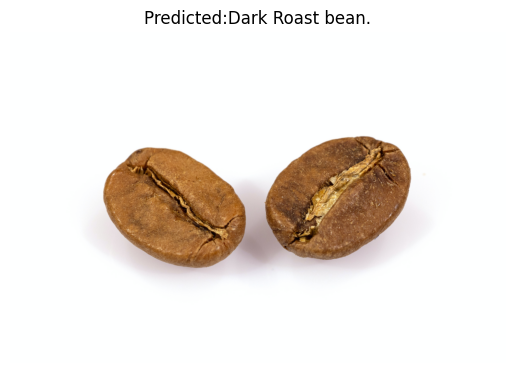

<class 'numpy.ndarray'>
1/1 [==============================] - 2s 2s/step
C:/Users/__VivoBook__/Downloads/test/bean30.jpg is Medium Roast bean.
[[8.2422128e-05 9.9991262e-01 3.8785165e-06 1.0748611e-06]]


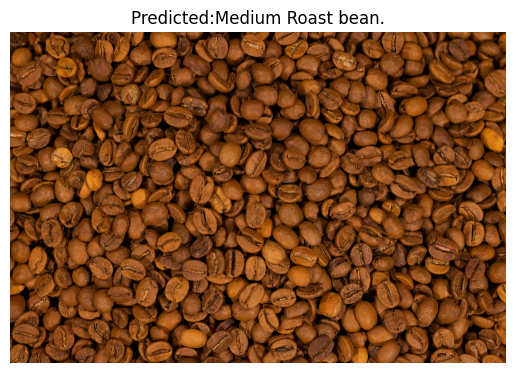

<class 'numpy.ndarray'>
1/1 [==============================] - 1s 1s/step
C:/Users/__VivoBook__/Downloads/test/bean31.jpg is Medium Roast bean.
[[9.5771895e-05 9.9989569e-01 7.5717626e-06 9.1718738e-07]]


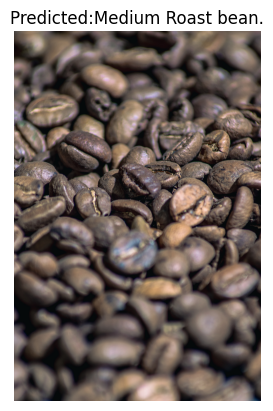

<class 'numpy.ndarray'>
1/1 [==============================] - 1s 728ms/step
C:/Users/__VivoBook__/Downloads/test/bean32.jpg is Dark Roast bean.
[[0.00167815 0.12667242 0.8665312  0.00511812]]


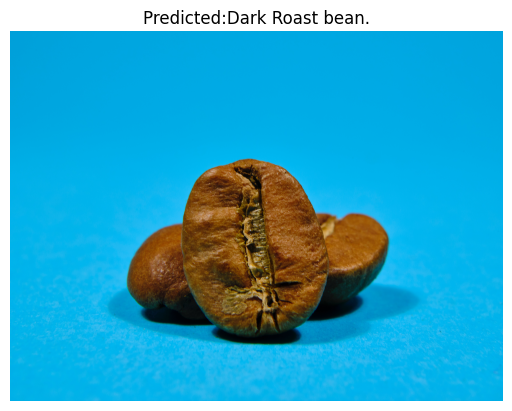

<class 'numpy.ndarray'>
1/1 [==============================] - 2s 2s/step
C:/Users/__VivoBook__/Downloads/test/bean33.jpg is Dark Roast bean.
[[1.2755554e-04 3.1077603e-01 6.8890768e-01 1.8870462e-04]]


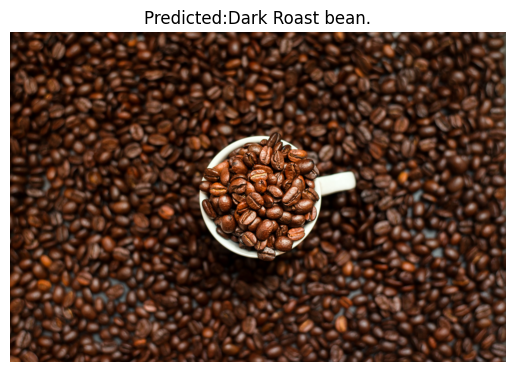

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 323ms/step
C:/Users/__VivoBook__/Downloads/test/bean35.jpg is Dark Roast bean.
[[6.6190253e-10 3.7481798e-06 9.9999583e-01 4.3117902e-07]]


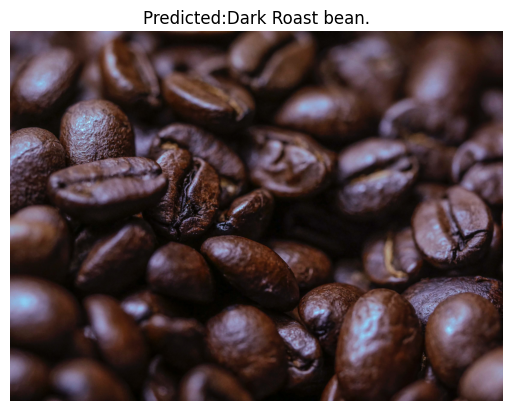

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 351ms/step
C:/Users/__VivoBook__/Downloads/test/bean36.jpg is Medium Roast bean.
[[2.2214708e-04 9.9724054e-01 2.5040433e-03 3.3286760e-05]]


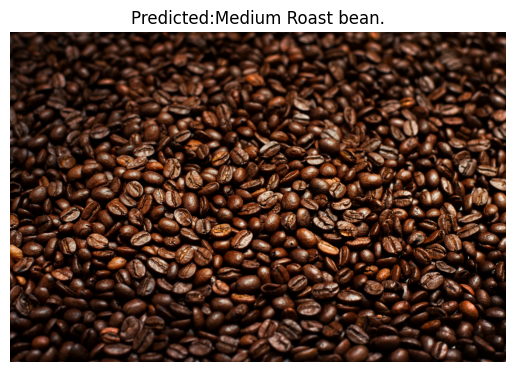

<class 'numpy.ndarray'>
1/1 [==============================] - 1s 950ms/step
C:/Users/__VivoBook__/Downloads/test/bean37.jpg is Dark Roast bean.
[[3.9760958e-11 3.0105082e-07 9.9999964e-01 7.3839335e-09]]


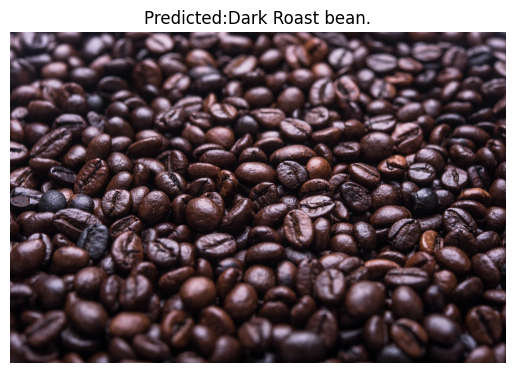

<class 'numpy.ndarray'>
1/1 [==============================] - 2s 2s/step
C:/Users/__VivoBook__/Downloads/test/bean38.jpg is Dark Roast bean.
[[8.7979235e-10 1.4807163e-06 9.9999845e-01 3.8519794e-08]]


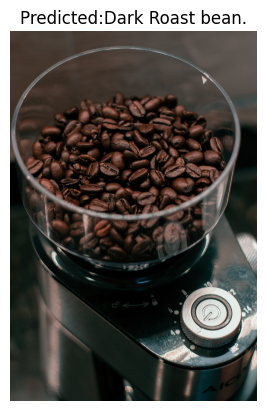

In [11]:
import numpy as np
import os
from tkinter import Tk, filedialog
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# Assuming you have already loaded and compiled your model

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    return img

# Open a file dialog to select multiple image files
Tk().withdraw()  # Hide the Tkinter main window
image_paths = filedialog.askopenfilenames(title="Select Images")

for image_path in image_paths:
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    print(type(preprocessed_image))

    # Make predictions
    predictions = new_model.predict(preprocessed_image)
    predicted_label = np.argmax(predictions)

    # Print the predicted label
    class_names = ['Raw', 'Medium Roast', 'Dark Roast', 'Light Roast']
    predicted_class = class_names[predicted_label]

    print(f"{image_path} is {predicted_class} bean.")
    print(predictions)
    # Load and display the image
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted:{predicted_class} bean.")
    plt.axis('off')
    plt.show()


In [15]:
import cv2
import numpy as np

img_path = 'test/bean8.jpeg'
img = cv2.imread(img_path)
img = cv2.resize(img, (64, 64))
img = np.expand_dims(img, axis=0)
img = img / 255.0
predictions = new_model.predict(img)
label = 'Good Bean' if predictions[0][0] > 0.8 else 'Bad Bean'
print(predictions)
print(label)


1/1 [==============================] - 0s 41ms/step
[[0.27197158 0.72802836]]
Bad Bean
